In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
input_data = pd.read_csv('/home/shovon26/Desktop/dataset_final.csv')

In [39]:
input_data.head()

,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,passwordmismatch,accountmismatch,oldBalanceDest,newBalanceDest,no_of_transactions_last_30_days,result
0,PAYMENT,1000.0,A1291549,10000.0,9000.0,M1645890,NO,NO,0,0,10,0
1,PAYMENT,2000.0,A3230311,20000.0,18000.0,M2309871,NO,NO,0,0,12,0
2,CASH_OUT,5000.0,B4812030,7000.0,2000.0,M1219343,NO,NO,0,0,50,0
3,PAYMENT,2500.0,B8201671,15000.0,12500.0,M3620760,NO,NO,0,0,30,0
4,PAYMENT,1000.0,A4925081,1500.0,500.0,M2159296,NO,NO,0,0,20,0


In [40]:
input_data.tail()

,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,passwordmismatch,accountmismatch,oldBalanceDest,newBalanceDest,no_of_transactions_last_30_days,result
94,PAYMENT,1070.0,A8707790,3456.5,2386.5,M2334593,NO,NO,0,0,52,0
95,PAYMENT,3729.0,A3456221,6783.0,3054.0,M4052375,NO,NO,0,0,15,0
96,PAYMENT,1450.0,D9818823,3490.0,2040.0,M3249781,NO,NO,0,0,32,0
97,PAYMENT,5460.0,D1123142,10000.0,4540.0,M1348752,NO,NO,0,0,3,0
98,PAYMENT,7890.0,D8882112,8000.0,110.0,M6578161,NO,NO,0,0,5,0


In [41]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
type                               99 non-null object
amount                             99 non-null float64
nameOrig                           99 non-null object
oldBalanceOrig                     99 non-null float64
newBalanceOrig                     99 non-null float64
nameDest                           99 non-null object
passwordmismatch                   99 non-null object
accountmismatch                    99 non-null object
oldBalanceDest                     99 non-null int64
newBalanceDest                     99 non-null int64
no_of_transactions_last_30_days    99 non-null int64
result                             99 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 9.4+ KB


In [42]:
input_data.isnull().sum()

type                               0
amount                             0
nameOrig                           0
oldBalanceOrig                     0
newBalanceOrig                     0
nameDest                           0
passwordmismatch                   0
accountmismatch                    0
oldBalanceDest                     0
newBalanceDest                     0
no_of_transactions_last_30_days    0
result                             0
dtype: int64

In [43]:
input_data['result'].value_counts()

0    92
1     7
Name: result, dtype: int64

In [44]:
input_data["amount"].describe()

count       99.000000
mean      5091.436869
std       7065.883804
min        100.000000
25%        769.625000
50%       2890.750000
75%       6000.000000
max      50000.000000
Name: amount, dtype: float64

In [45]:
input_data["result"].describe()

count    99.000000
mean      0.070707
std       0.257639
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: result, dtype: float64

In [46]:
input_data.result

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    0
21    0
22    0
23    0
24    1
25    0
26    0
27    0
28    0
29    0
     ..
69    0
70    0
71    1
72    0
73    1
74    0
75    0
76    0
77    0
78    0
79    0
80    0
81    0
82    0
83    0
84    1
85    0
86    0
87    0
88    0
89    0
90    0
91    0
92    1
93    0
94    0
95    0
96    0
97    0
98    0
Name: result, Length: 99, dtype: int64

In [48]:
legit = input_data[input_data.result == 0]
fraud = input_data[input_data.result == 1]

In [49]:
print(legit.shape)
print(fraud.shape)

(92, 12)
(7, 12)


In [50]:
legit.amount.describe()

count       92.000000
mean      4431.437500
std       5261.587787
min        100.000000
25%        575.000000
50%       2530.000000
75%       6000.000000
max      30000.000000
Name: amount, dtype: float64

In [51]:
fraud.amount.describe()

count        7.000000
mean     13765.714286
std      17353.046665
min        800.000000
25%       3500.000000
50%       5000.000000
75%      16780.000000
max      50000.000000
Name: amount, dtype: float64

In [52]:
input_data.groupby('result').mean()

,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,no_of_transactions_last_30_days
result,,,,,,
0,4431.437500,8646.125000,4214.687500,0.0,0.000000,41.663043
1,13765.714286,14714.285714,948.571429,0.0,3508.571429,76.285714


In [55]:
legit = len(input_data[input_data.result == 0])
fraud = len(input_data[input_data.result == 1])
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit Transactions : ", legit)
print("Number of Fraud Transactions : ", fraud)
print("Percentage of Fraud Transaction : ", fraud_percent)

Number of Legit Transactions :  92
Number of Fraud Transactions :  7
Percentage of Fraud Transaction :  7.07070707070707


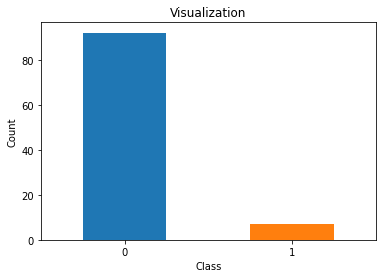

In [58]:
#Plot using matplotlib.pyplot

labels = ["LEGIT", "FRAUD"]
count_results = input_data['result'].value_counts()
#count_results = input_data['result'].value_counts(input_data['result'], sort = True)
count_results.plot(kind = "bar", rot = 0)
plt.title("Visualization")
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

In [1]:
legit_sample = legit.sample(n == 7)

NameError: name 'legit' is not defined